In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Data Exploratory and Cleaning

source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute Information:

### Input variables:
#### bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue--collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


Citation Request:

This dataset is public available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [2]:
data_raw = pd.read_csv(r'D:\datasets\bank marketing\bank.csv')
data_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data_raw.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [4]:
df = data_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [6]:
for col in cat_cols:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  int64   
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   default    11162 non-null  category
 5   balance    11162 non-null  int64   
 6   housing    11162 non-null  category
 7   loan       11162 non-null  category
 8   contact    11162 non-null  category
 9   day        11162 non-null  int64   
 10  month      11162 non-null  category
 11  duration   11162 non-null  int64   
 12  campaign   11162 non-null  int64   
 13  pdays      11162 non-null  int64   
 14  previous   11162 non-null  int64   
 15  poutcome   11162 non-null  category
 16  deposit    11162 non-null  category
dtypes: category(10), int64(7)
memory usage: 721.3 KB


In [7]:
float_cols = [col for col in df.columns if df[col].dtype == 'int64']
float_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [8]:
for col in float_cols:
    df[col] = df[col].astype('float64')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  float64 
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   default    11162 non-null  category
 5   balance    11162 non-null  float64 
 6   housing    11162 non-null  category
 7   loan       11162 non-null  category
 8   contact    11162 non-null  category
 9   day        11162 non-null  float64 
 10  month      11162 non-null  category
 11  duration   11162 non-null  float64 
 12  campaign   11162 non-null  float64 
 13  pdays      11162 non-null  float64 
 14  previous   11162 non-null  float64 
 15  poutcome   11162 non-null  category
 16  deposit    11162 non-null  category
dtypes: category(10), float64(7)
memory usage: 721.3 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [10]:
df.describe(include=['category']).T

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


# Data Visualiztion

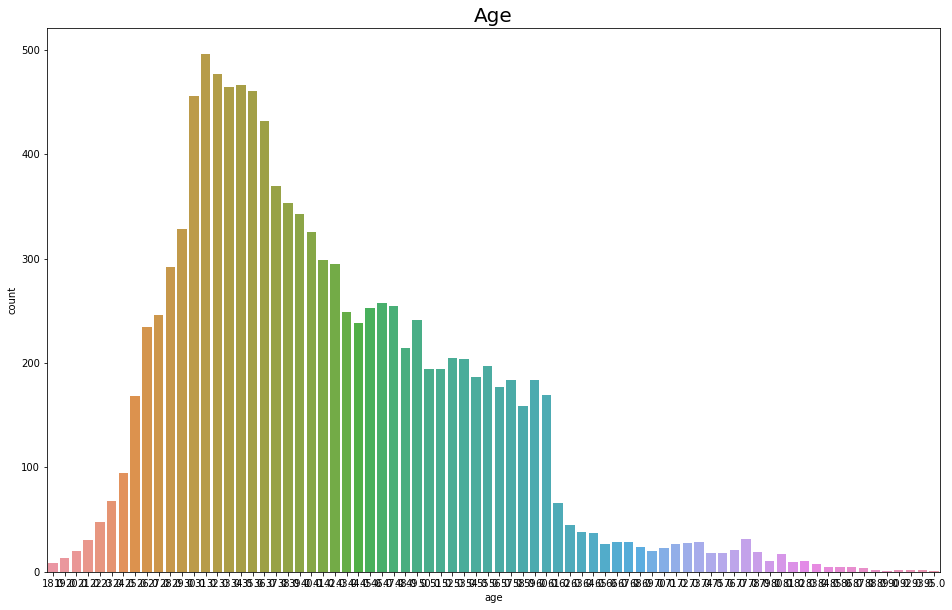

In [11]:

plt.figure(figsize=(16,10))
plt.title('Age', fontsize=20)
sns.countplot(x='age',data=df)
plt.show()

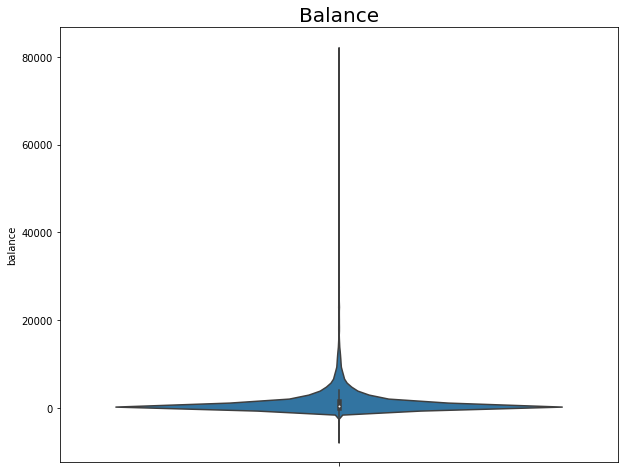

In [12]:
plt.figure(figsize=(10,8))
plt.title('Balance', fontsize=20)
sns.violinplot(data = df, y='balance')
plt.show()

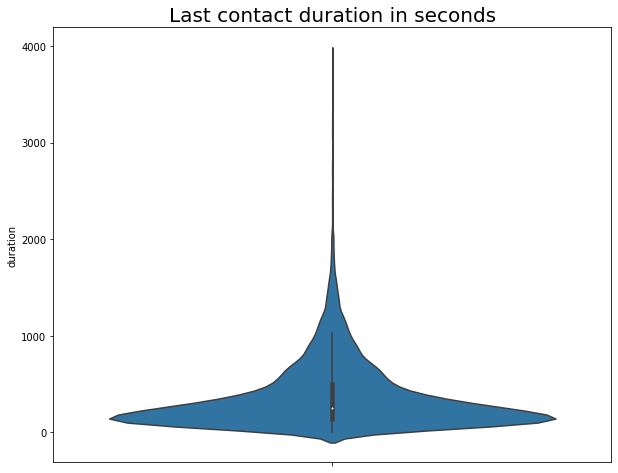

In [13]:
plt.figure(figsize=(10,8))
plt.title('Last contact duration in seconds', fontsize=20)
sns.violinplot(data = df, y='duration')
plt.show()


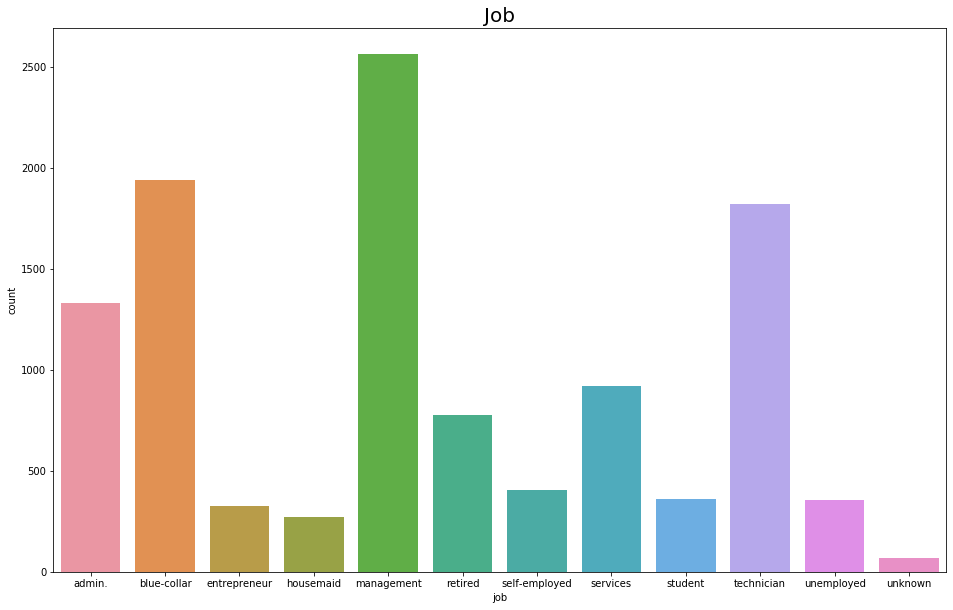

In [14]:
plt.figure(figsize=(16,10))
plt.title('Job', fontsize=20)
sns.countplot(x='job',data=df)
plt.show()

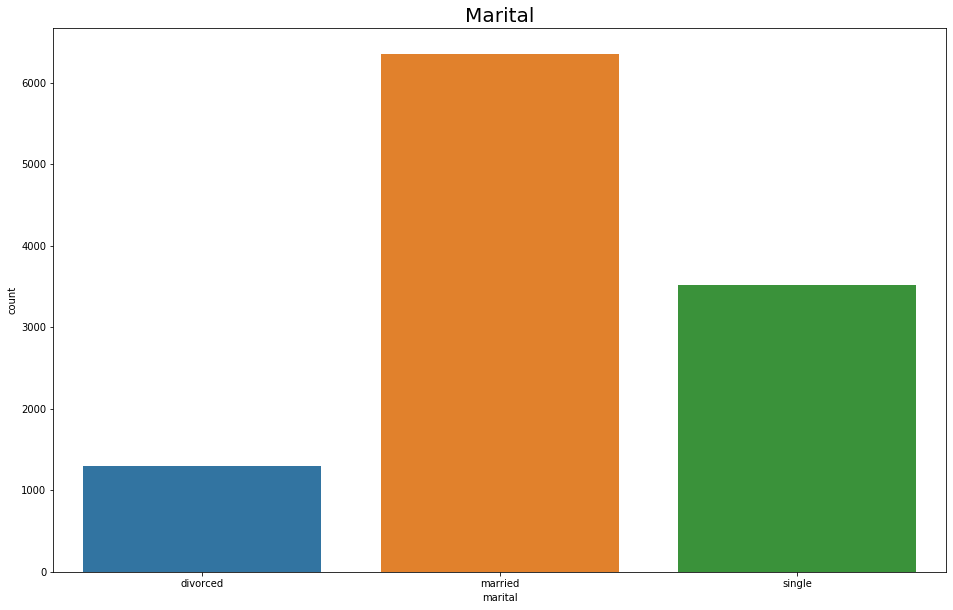

In [15]:
plt.figure(figsize=(16,10))
plt.title('Marital', fontsize=20)
sns.countplot(x='marital',data=df)
plt.show()

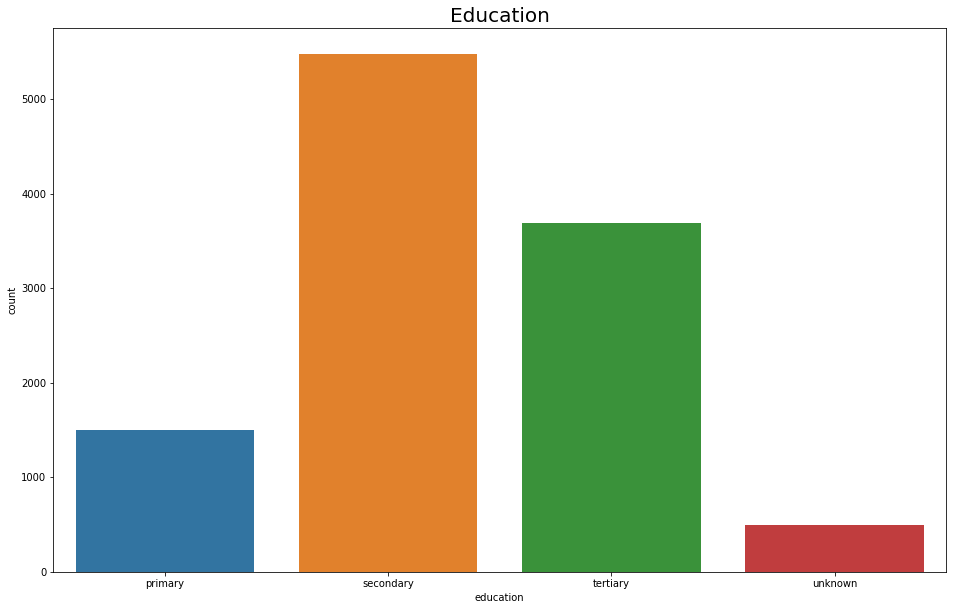

In [16]:
plt.figure(figsize=(16,10))
plt.title('Education', fontsize=20)
sns.countplot(x='education',data=df)
plt.show()

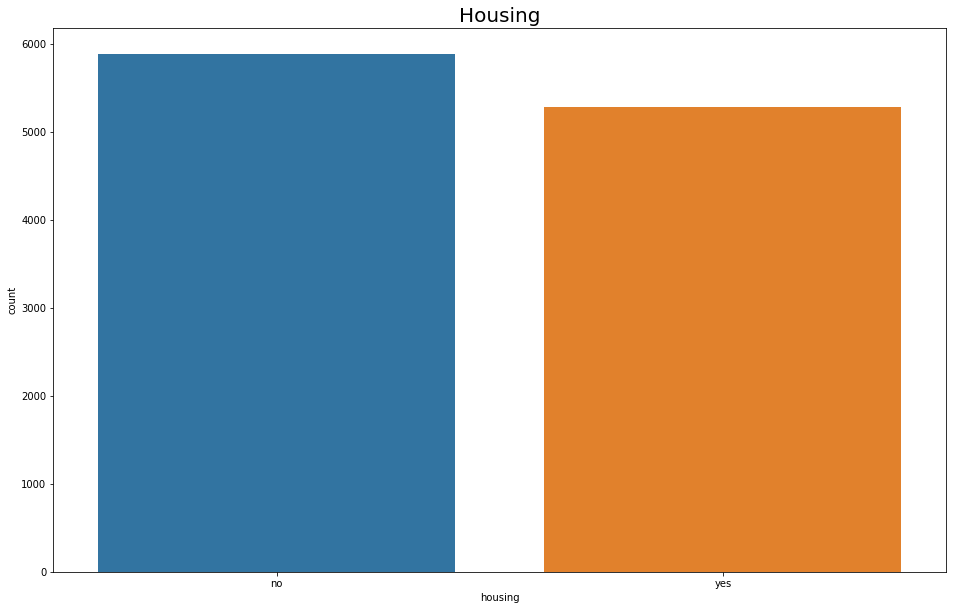

In [17]:
plt.figure(figsize=(16,10))
plt.title('Housing', fontsize=20)
sns.countplot(x='housing',data=df)
plt.show()

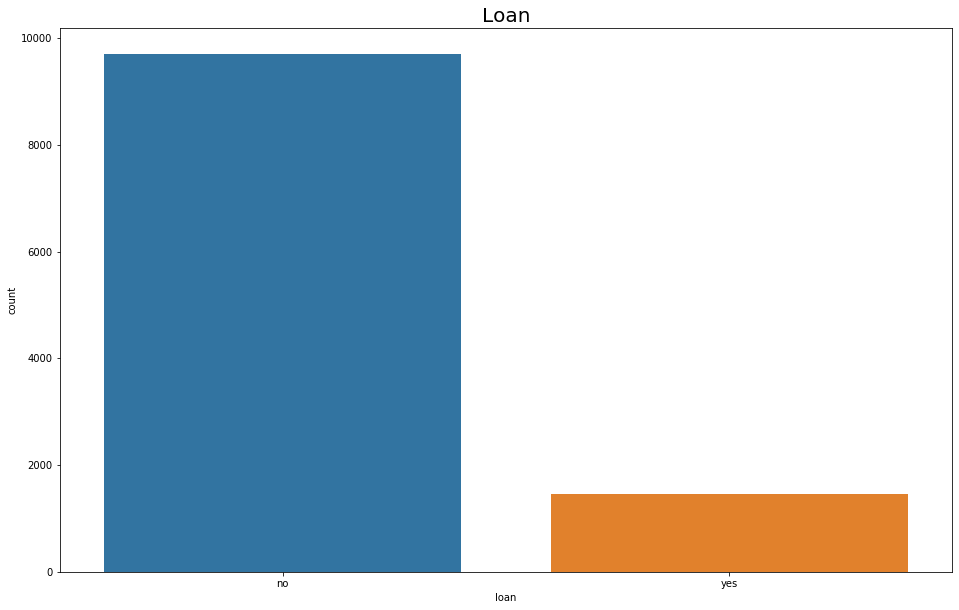

In [18]:
plt.figure(figsize=(16,10))
plt.title('Loan', fontsize=20)
sns.countplot(x='loan',data=df)
plt.show()

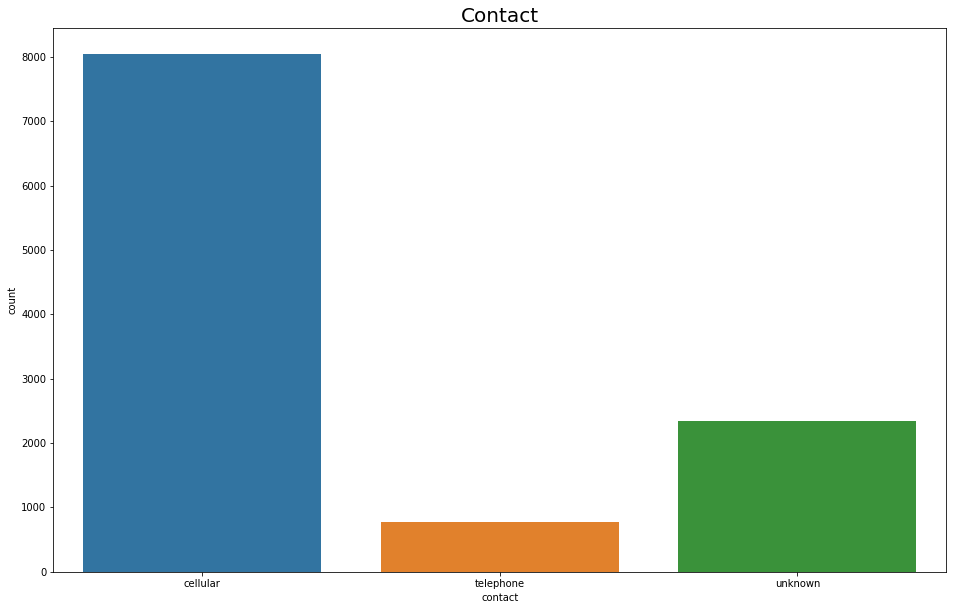

In [19]:
plt.figure(figsize=(16,10))
plt.title('Contact', fontsize=20)
sns.countplot(x='contact',data=df)
plt.show()

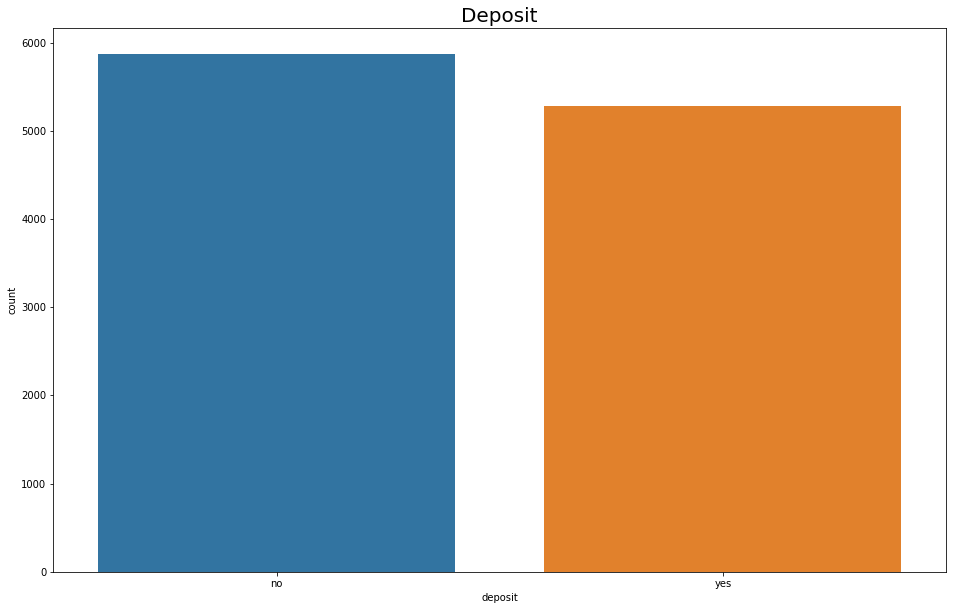

In [20]:
plt.figure(figsize=(16,10))
plt.title('Deposit', fontsize=20)
sns.countplot(x='deposit',data=df)
plt.show()

# Correlations

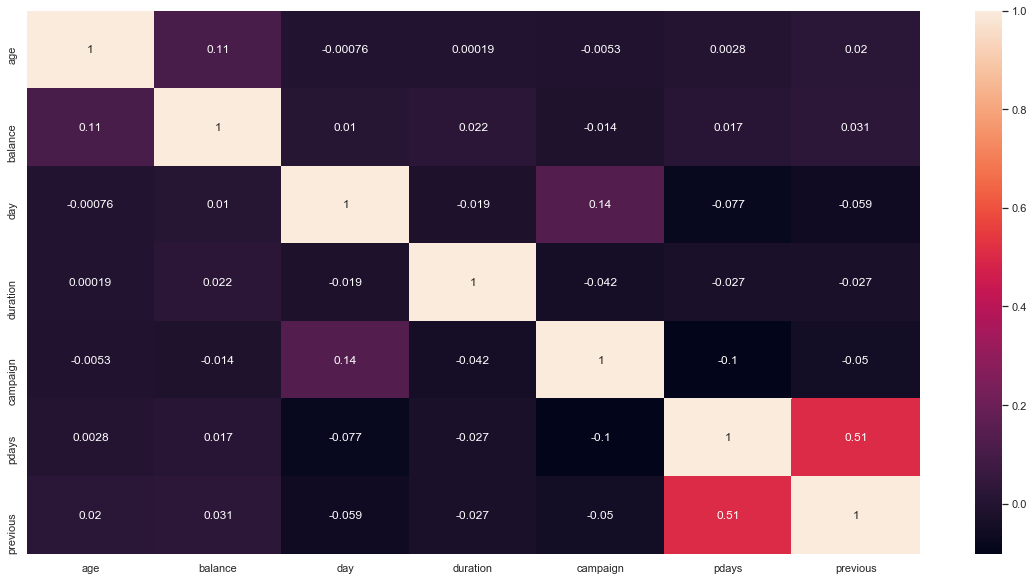

In [21]:
sns.set(style='white')
df1=df.drop(['deposit'],axis=1)

plt.figure(figsize=(20,10)) 
sns.heatmap(df1.corr(), annot=True)

# Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler as scaler

In [23]:
df[float_cols] = scaler().fit_transform(df[float_cols])

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1.930226,-0.554168,-0.481184,-0.36326,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,3.154612,-0.554168,-0.481184,-0.36326,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,2.929901,-0.554168,-0.481184,-0.36326,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,0.596366,-0.554168,-0.481184,-0.36326,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,0.867171,-0.186785,-0.481184,-0.36326,unknown,yes


In [25]:
from sklearn.preprocessing import LabelEncoder as le

In [26]:
df['deposit'] = le().fit_transform(df['deposit'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1.930226,-0.554168,-0.481184,-0.36326,unknown,1
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,3.154612,-0.554168,-0.481184,-0.36326,unknown,1
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,2.929901,-0.554168,-0.481184,-0.36326,unknown,1
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,0.596366,-0.554168,-0.481184,-0.36326,unknown,1
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,0.867171,-0.186785,-0.481184,-0.36326,unknown,1


In [27]:
df = pd.get_dummies(data = df, drop_first=True)

df.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
data = df.copy()
target = data.pop('deposit')
data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (8371, 42)
y_train shape (8371,)
X_test shape (2791, 42)
y_test shape (2791,)


# Looking for the best model for prediction

Let's check 3 different models which are going to be:
- K-nearest Neighbour Algorithm
- Logistic Regression
- Random Forest Classifier

### K-nearest Neighbour Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
calssifier = KNeighborsClassifier()
grid_params = {'n_neighbors': [3,5,11,19],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

gs = GridSearchCV(calssifier, param_grid=grid_params, scoring='accuracy', cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}

In [35]:
classifier = KNeighborsClassifier(n_neighbors=19, metric='euclidean', weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

Accuracy: 0.8337513436044428


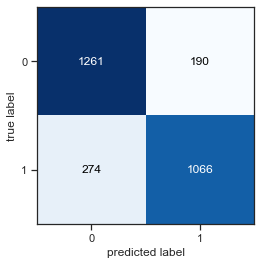

In [37]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1451
           1       0.85      0.80      0.82      1340

    accuracy                           0.83      2791
   macro avg       0.84      0.83      0.83      2791
weighted avg       0.83      0.83      0.83      2791



### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(data, target)

In [42]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(Xl_train,yl_train)

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be cha

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be cha

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be cha

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
logreg_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [44]:
logreg2=LogisticRegression(C=1,penalty="l1")
logreg2.fit(Xl_train,yl_train)
print("score",logreg2.score(Xl_test,yl_test))

D:\programy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



score 0.8301683984235041


Accuracy: 0.8301683984235041


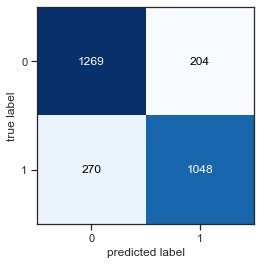

In [45]:
yl_pred = logreg2.predict(Xl_test)
cm2 = confusion_matrix(yl_test, yl_pred)
plot_confusion_matrix(cm2)

print(f'Accuracy: {accuracy_score(yl_test, yl_pred)}')

In [46]:
print(classification_report(yl_test, yl_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1473
           1       0.84      0.80      0.82      1318

    accuracy                           0.83      2791
   macro avg       0.83      0.83      0.83      2791
weighted avg       0.83      0.83      0.83      2791



### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(data, target)


In [49]:
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [200,700],
    'max_features':['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(Xr_train, yr_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [50]:
CV_rfc.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

In [51]:
rfc2=RandomForestClassifier(max_features='auto', n_estimators=700)
rfc2.fit(Xr_train,yr_train)
print("score",rfc2.score(Xr_test, yr_test))

score 0.8419921175206019


Accuracy: 0.8419921175206019


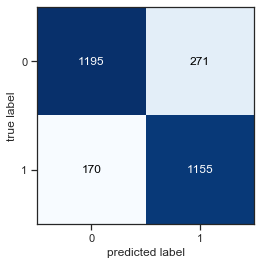

In [52]:
yr_pred = rfc2.predict(Xr_test)
cm3 = confusion_matrix(yr_test, yr_pred)
plot_confusion_matrix(cm3)

print(f'Accuracy: {accuracy_score(yr_test, yr_pred)}')

In [53]:
print(classification_report(yr_test, yr_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.84      1466
           1       0.81      0.87      0.84      1325

    accuracy                           0.84      2791
   macro avg       0.84      0.84      0.84      2791
weighted avg       0.84      0.84      0.84      2791



# Conclusion

It's looks like Random Forest Classifier has the best accuracy at 84%.
The other two models K-nearest Neighbour Algorithm and Logistic Regression had pretty good performance as well. Both had accuracy around 83%.